In [16]:
import cv2
import matplotlib.pyplot as pIt
import numpy as np
from sklearn.cluster import KMeans


In [17]:
impage_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(impage_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

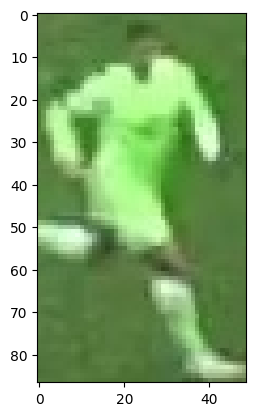

In [18]:
pIt.imshow(image)
pIt.show()

# Take the top half of the image

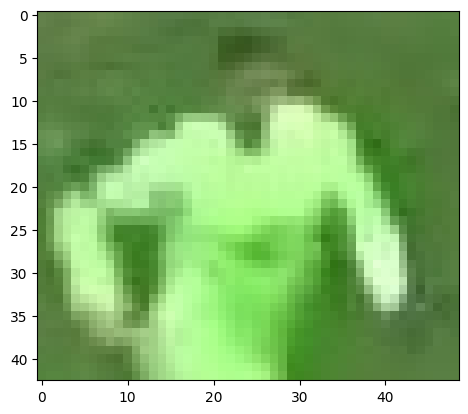

In [19]:
top_half_image = image[0: int(image.shape[0]/2), :]
pIt.imshow(top_half_image)

# Cluster the image into two clusters

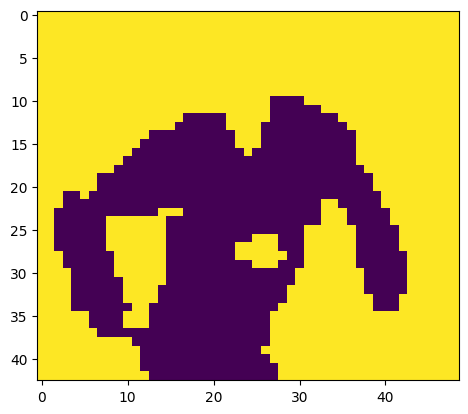

In [21]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1,3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# get cluster labels
labels = kmeans.labels_

# reshape the labels to the original image shape
cluster_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the cluster images
pIt.imshow(cluster_image)
pIt.show()

In [22]:
corner_cluster = [cluster_image[0,0], cluster_image[0,-1], cluster_image[-1,0], cluster_image[-1,-1]]
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)
print(non_player_cluster)

1


In [23]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [24]:
kmeans.cluster_centers_[player_cluster]

array([170.50542005, 235.95257453, 142.57181572])